#  1. Image Maths

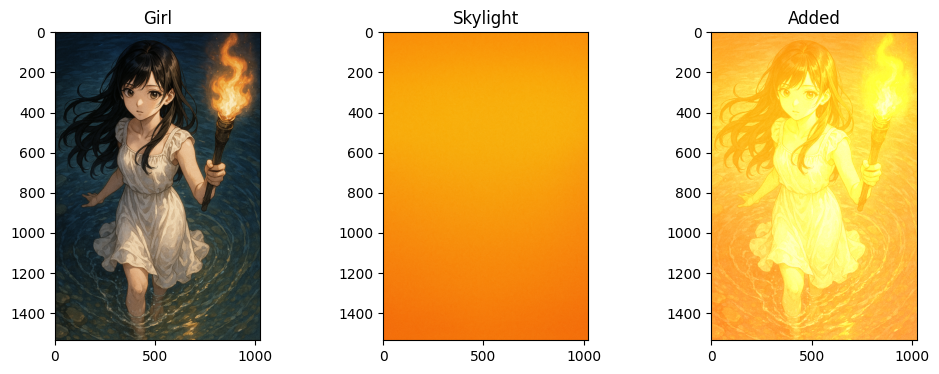

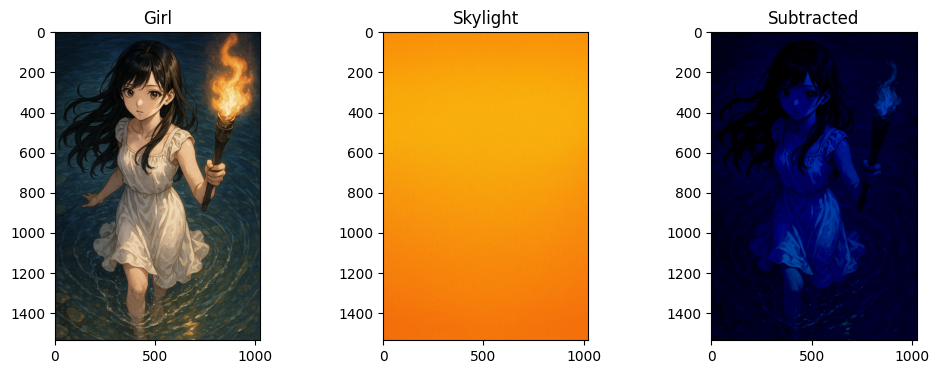

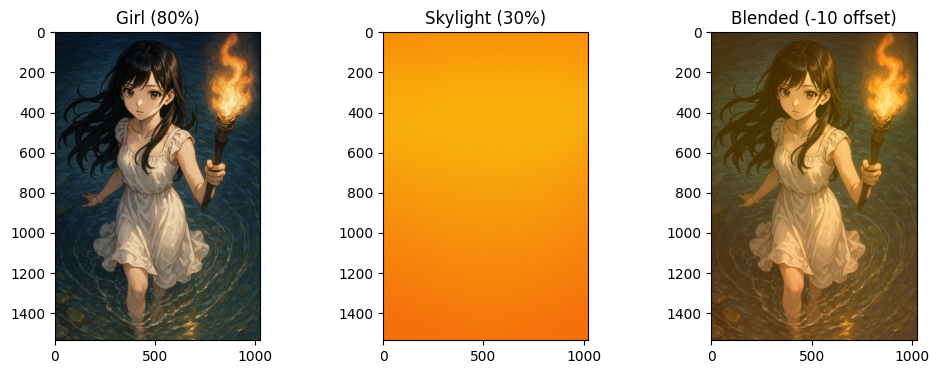

In [14]:
import cv2
import matplotlib.pyplot as plt

girl = cv2.imread('images/Cielo.png')
girl = cv2.cvtColor(girl, cv2.COLOR_BGR2RGB)
skylight = cv2.imread('images/SkyLight.png')
skylight = cv2.cvtColor(skylight, cv2.COLOR_BGR2RGB)
skylight = cv2.resize(skylight, (girl.shape[1], girl.shape[0]))

# Adition (Saturated)
added = cv2.add(girl, skylight)

# Subtraction (difference)
subtracted = cv2.subtract(girl, skylight)

# Weighted Blending
blended = cv2.addWeighted(girl, 0.8, skylight, 0.3, -10)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1); plt.imshow(girl); plt.title('Girl')
plt.subplot(1, 3, 2); plt.imshow(skylight); plt.title('Skylight')
plt.subplot(1, 3, 3); plt.imshow(added); plt.title('Added')
plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1); plt.imshow(girl); plt.title('Girl')
plt.subplot(1, 3, 2); plt.imshow(skylight); plt.title('Skylight')
plt.subplot(1, 3, 3); plt.imshow(subtracted); plt.title('Subtracted')
plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1); plt.imshow(girl); plt.title('Girl (80%)')
plt.subplot(1, 3, 2); plt.imshow(skylight); plt.title('Skylight (30%)')
plt.subplot(1, 3, 3); plt.imshow(blended); plt.title('Blended (-10 offset)')
plt.show()

# 2. Image Transformations

### Resize (Scaling)
This is a linear scaling:

$$
\begin{bmatrix} x' \\ y' \end{bmatrix} =
\begin{bmatrix} s_x & 0 \\ 0 & s_y \end{bmatrix}
\begin{bmatrix} x \\ y \end{bmatrix}
$$


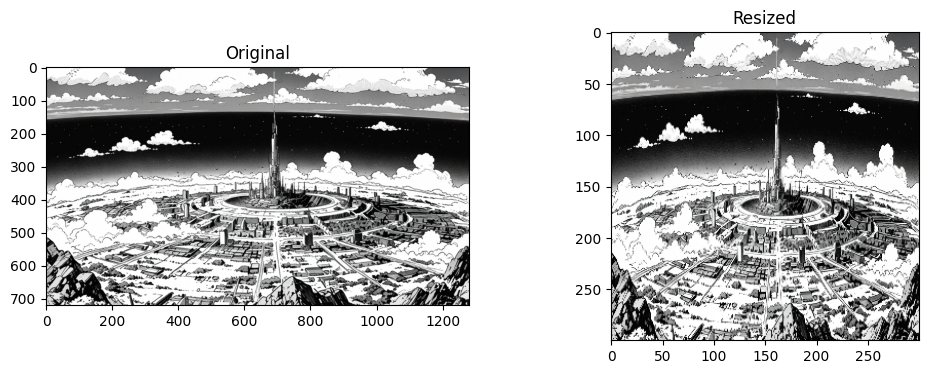

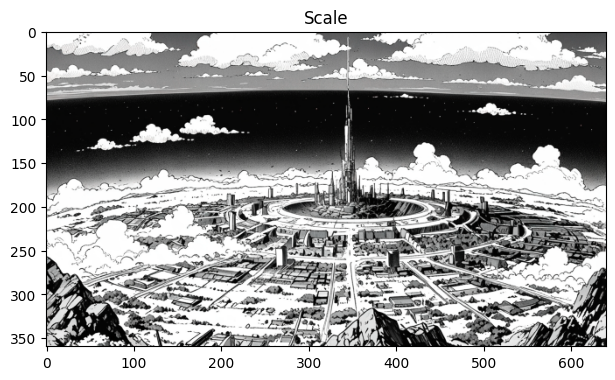

In [23]:
img1 = cv2.imread('images/new_world.jpg')
resized = cv2.resize(img1, (300, 300))  # to size
resized_scale = cv2.resize(img1, None, fx=0.5, fy=0.5)  # scale by factor

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1); plt.imshow(img1); plt.title('Original')
plt.subplot(1, 2, 2); plt.imshow(resized); plt.title('Resized')
plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2); plt.imshow(resized_scale); plt.title('Scale')
plt.tight_layout()
plt.show()

### Flip (reflection)

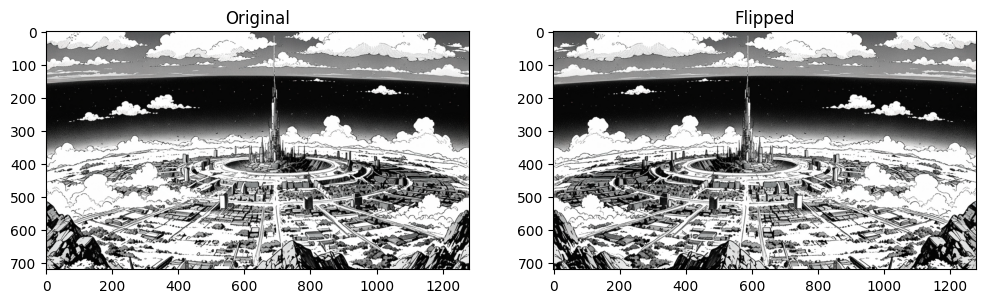

In [25]:
# Flip directions:
# 0 = vertical, 1 = horizontal, -1 = both
flipped = cv2.flip(img1, 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1); plt.imshow(img1); plt.title('Original')
plt.subplot(1, 2, 2); plt.imshow(flipped); plt.title('Flipped')
plt.show()

### Rotate

Rotation around center ($c_x$, $c_y$) using a rotation matrix:
$$
M = 
\begin{bmatrix}
\cos\theta & -\sin\theta & (1 - \cos\theta)\cdot c_x + \sin\theta \cdot c_y \\
\sin\theta & \cos\theta & (1 - \cos\theta)\cdot c_y - \sin\theta \cdot c_x
\end{bmatrix}
$$

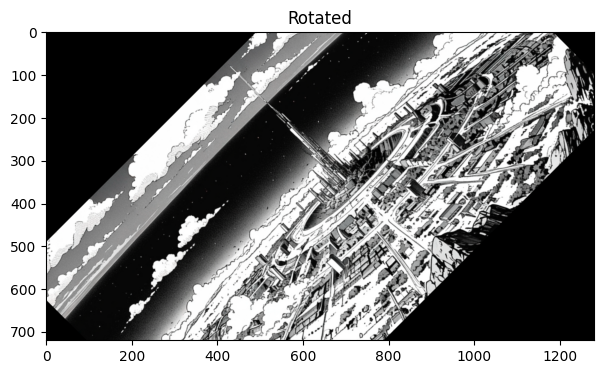

In [27]:
(h, w) = img1.shape[:2]
center = (w // 2, h // 2)

M = cv2.getRotationMatrix2D(center, 45, 1.0)  # Rotate 45°
rotated = cv2.warpAffine(img1, M, (w, h))

plt.figure(figsize=(12, 4)); plt.imshow(rotated); plt.title('Rotated'); plt.show()

### Crop

Just use slicing (NumPy):

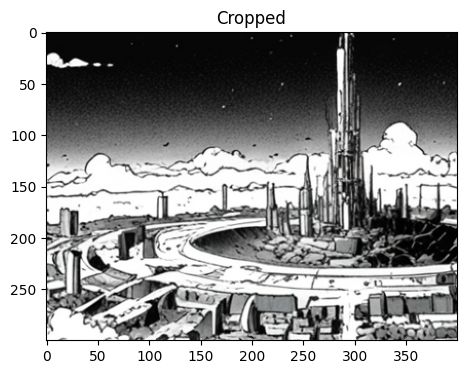

In [29]:
cropped = img1[200:500, 400:800]  # [y1:y2, x1:x2]

plt.figure(figsize=(12, 4)); plt.imshow(cropped); plt.title('Cropped'); plt.show()

### Affine Transform (General Form)

Affine transformation preserves **lines and parallelism**:

$$
\begin{bmatrix}
x' \\
y'
\end{bmatrix}
=
\begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}
+
\begin{bmatrix}
t_x \\
t_y
\end{bmatrix}
$$

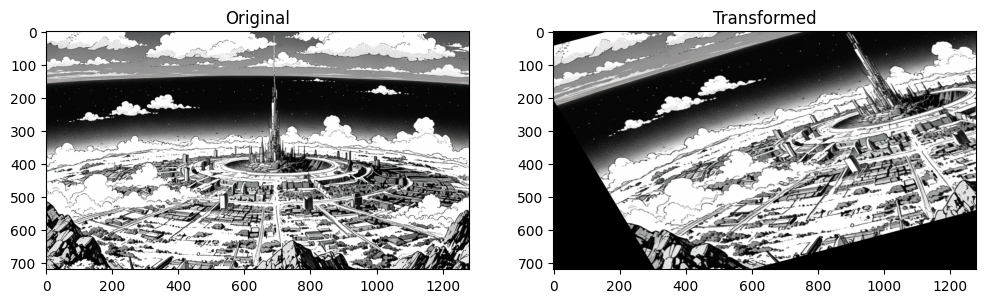

In [31]:
import numpy as np

# Define three points in the original image
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])

# Define the corresponding points in the transformed image
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])

# Compute the affine transformation matrix from the two sets of points
M = cv2.getAffineTransform(pts1, pts2)

# Apply the affine transformation to the image
affine_transformed = cv2.warpAffine(img1, M, (img1.shape[1], img1.shape[0]))

# Plot the original and transformed images side by side
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1); plt.imshow(img1); plt.title('Original')  # Original image
plt.subplot(1, 2, 2); plt.imshow(affine_transformed); plt.title('Transformed')  # Transformed image
plt.show()